In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:

os.chdir("P:\\Courses\\Kaggle\\Titanic\\Data")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

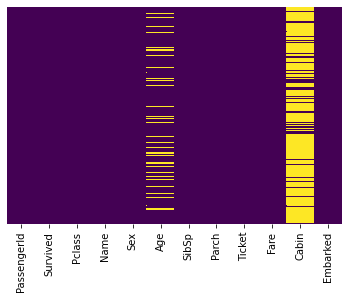

In [6]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [7]:
for col in train.columns:
    print(col, str(round(100* train[col].isnull().sum() / len(train), 2)) + '%')

PassengerId 0.0%
Survived 0.0%
Pclass 0.0%
Name 0.0%
Sex 0.0%
Age 19.87%
SibSp 0.0%
Parch 0.0%
Ticket 0.0%
Fare 0.0%
Cabin 77.1%
Embarked 0.22%


<AxesSubplot:xlabel='Survived', ylabel='count'>

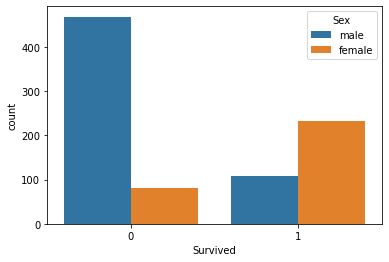

In [8]:
sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

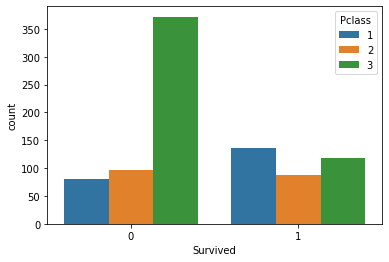

In [9]:
sns.countplot(x='Survived', data=train, hue='Pclass')

<AxesSubplot:xlabel='Age'>

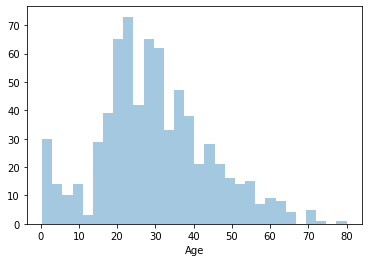

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

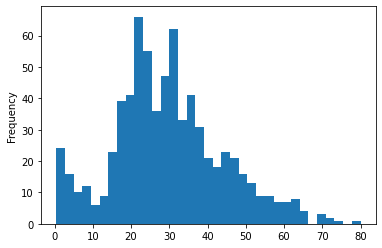

In [11]:
train['Age'].plot.hist(bins=35)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

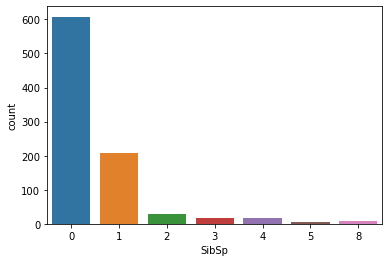

In [12]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

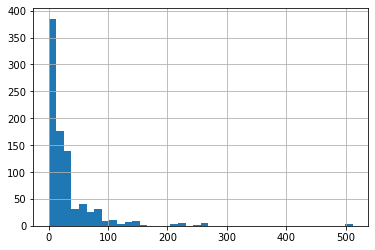

In [13]:
train['Fare'].hist(bins=40)

# Data Handling

In [14]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1: 
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [15]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

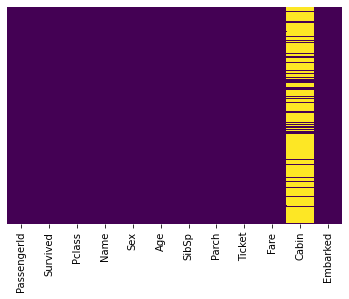

In [16]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [17]:
train.drop(['Cabin'],axis=1,inplace=True)

In [18]:
train.dropna(inplace=True)

<AxesSubplot:>

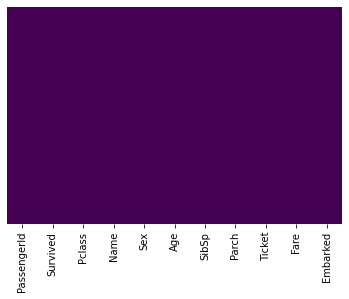

In [19]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

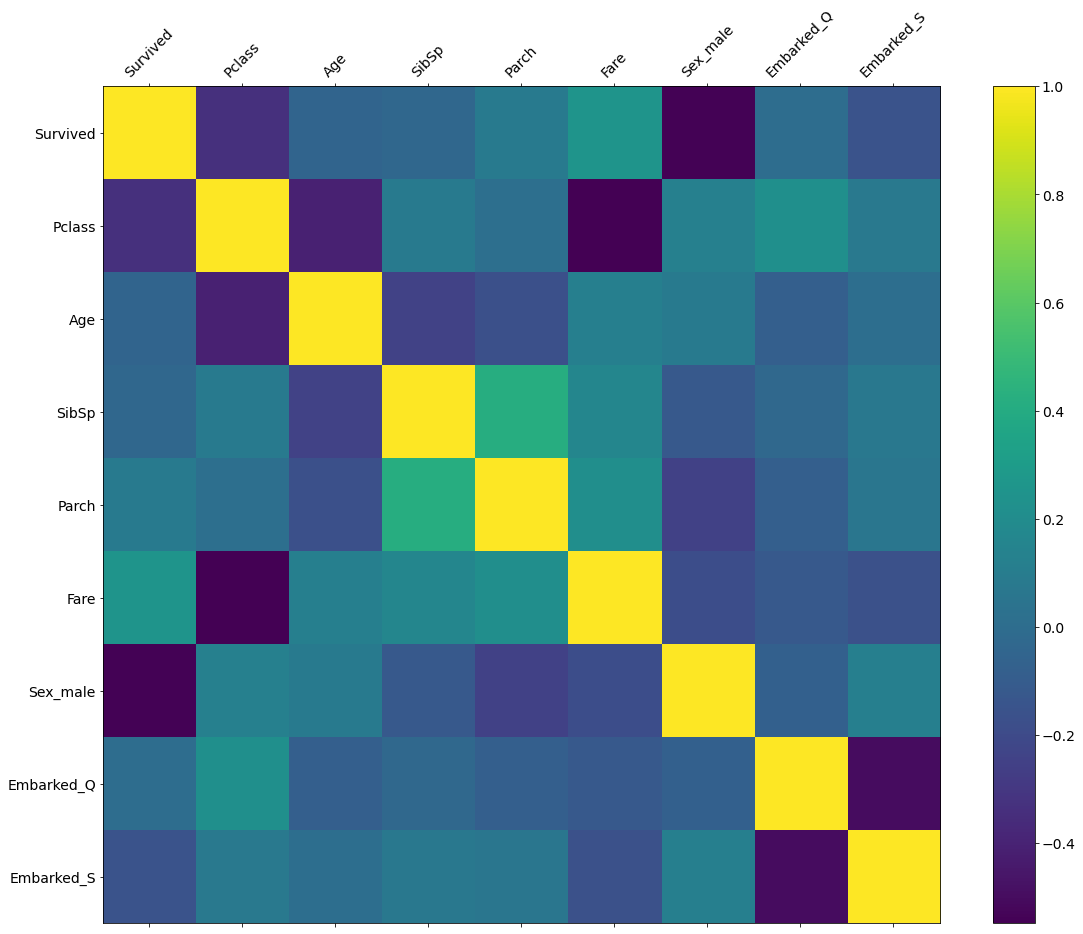

In [64]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Dummy Creation

In [20]:
dums=pd.get_dummies(train[['Sex', 'Embarked']], drop_first=True)

In [21]:
train=pd.concat([train,dums], axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [23]:
train.drop(['Sex', 'Embarked','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# MODEL DEVELOPMENT

In [25]:
X=train.drop(['Survived'], axis=1)
Y=train['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=176)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel=LogisticRegression()

In [30]:
logmodel.fit(X_train, Y_train)

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
predictions=logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       152
           1       0.78      0.66      0.72       115

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.77       267



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(Y_test,predictions)

array([[131,  21],
       [ 39,  76]], dtype=int64)

In [55]:
from sklearn import metrics

In [56]:
print(metrics.mean_absolute_error(Y_test,predictions))
print(metrics.mean_squared_error(Y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

0.2247191011235955
0.2247191011235955
0.4740454631399772


# TEST DATA PREP

In [36]:
test['Age']=test[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

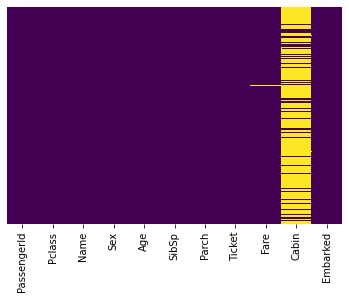

In [38]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [37]:
test.drop(['Cabin'],axis=1,inplace=True)

In [43]:
for col in test.columns:
    print(col, str(round(100* test[col].isnull().sum() / len(test), 2)) + '%')

PassengerId 0.0%
Pclass 0.0%
Name 0.0%
Sex 0.0%
Age 0.0%
SibSp 0.0%
Parch 0.0%
Ticket 0.0%
Fare 0.24%
Embarked 0.0%


In [44]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

<AxesSubplot:>

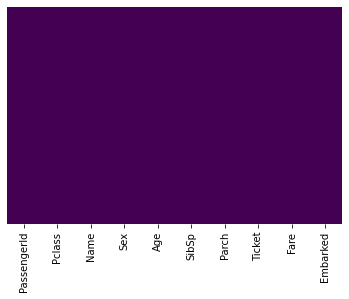

In [45]:
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [47]:
dumst=pd.get_dummies(test[['Sex', 'Embarked']], drop_first=True)

In [48]:
test=pd.concat([test,dumst], axis=1)

In [49]:
test.drop(['Sex', 'Embarked','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [50]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


# PREDICTIONS ON SAMPLE DATA - LOGISTIC 

In [51]:
predictions1=logmodel.predict(test)

In [54]:
predictions1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
dataset = pd.DataFrame(predictions1)

In [61]:
dataset.to_csv("logmodel1.csv")